<a href="https://colab.research.google.com/github/alimanur/MLTSA_anurlan/blob/master/ClimateBSTS_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
! pip install pydlm
from pydlm import dlm, trend, seasonality, dynamic

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for pydlm: filename=pydlm-0.1.1.11-py2.py3-none-any.whl size=58997 sha256=c3b5f713aaceadb8e009a3f937a829a8c863d4f91e95041261d68262fa047325
  Stored in directory: /root/.cache/pip/wheels/69/d3/ca/f5a7bc0976a2779bf87c20f82a9adece40616ee3b9d39bf410
Successfully built pydlm


# Data acquisition and pre-processing

## CO2

In [0]:
from google.colab import drive

drive.mount("/content/gdrive")
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [0]:
cd MLTSA2020/

/content/gdrive/My Drive/MLTSA2020


acquire the Co2 emission data from the world bank. save it on your drive and read it in
The file should be called API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv and should be store on your google drive in MLTSA/data.

Choose the "world" row and transpose the file so that it has one column, world, which you should rename "co2", and N rows for N years. Make sure the years are readin as datetime data type (you can use pd.to_datetime(... format="%Y") 


In [0]:
!ls data

API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv
Data
ETFs
price-volume-data-for-all-us-stocks-etfs.zip
Stocks
TESLA


In [0]:
co2 = pd.read_csv(...

In [0]:
co2.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
count,193.000000,194.000000,196.000000,197.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,205.000000,206.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,209.000000,209.000000,209.000000,209.000000,215.000000,217.000000,241.000000,241.000000,242.000000,243.000000,243.000000,244.000000,245.000000,245.000000,245.000000,245.000000,246.000000,246.000000,246.000000,247.000000,248.000000,249.000000,249.000000,249.000000,249.000000,249.000000,251.000000,251.000000,250.000000,1.0,1.0,1.0,1.0,0.0,0.0
mean,2.037282,2.150171,2.241690,2.753812,2.916141,3.035673,3.049316,3.116120,3.315619,3.927816,4.204099,4.427336,4.494008,4.812818,4.507408,4.377664,4.368837,4.499300,4.526618,4.577355,4.475246,4.003176,3.883912,3.735079,3.833816,3.927593,3.913394,3.950233,4.084677,4.219883,4.087860,4.125632,4.482813,4.505842,4.428009,4.478244,4.496961,4.495002,4.485427,4.453672,4.583647,4.637700,4.605110,4.737570,4.784463,4.826155,4.901256,4.930568,4.935583,4.721868,4.847677,4.811059,4.955428,4.872777,4.886320,0.0,0.0,0.0,0.0,NaN,NaN
std,4.184849,4.377180,4.717044,8.443484,8.493180,8.706497,8.062852,7.263779,7.187105,9.921855,9.263233,9.886576,10.141886,10.766220,9.198437,8.467537,8.085626,8.012298,8.069064,7.968325,7.429310,6.211035,5.797967,5.297735,5.576488,5.617238,5.537729,5.336876,5.485957,5.738058,5.639184,5.694542,6.025123,6.347220,6.247433,6.392206,6.252384,6.563317,6.179797,5.966715,6.380133,6.535791,6.335804,6.387948,6.304327,6.408915,6.528367,6.353846,6.134005,5.811829,5.858565,5.786095,6.155163,5.840759,6.068998,NaN,NaN,NaN,NaN,NaN,NaN
min,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,0.012334,0.011946,0.011574,0.011215,0.009735,0.009747,0.009905,0.010192,0.007379,0.004333,0.035283,0.029589,0.028209,0.030747,0.041402,0.035264,0.035641,0.036583,0.011809,0.017783,0.023982,0.010720,0.013268,0.013966,0.015142,0.015693,0.017195,0.019060,0.019350,0.020034,0.017282,0.017264,0.018603,0.019182,0.022595,0.020912,0.024582,0.023787,0.023466,0.022707,0.024515,0.027016,0.030539,0.030365,0.044700,0.0,0.0,0.0,0.0,NaN,NaN
25%,0.183316,0.180620,0.198531,0.199338,0.214492,0.233321,0.242972,0.251838,0.280633,0.320451,0.349795,0.340798,0.355732,0.368516,0.371617,0.380724,0.362854,0.387947,0.401433,0.438602,0.448290,0.466774,0.453681,0.450120,0.475806,0.473886,0.441159,0.483382,0.500122,0.497808,0.457140,0.440831,0.569229,0.528187,0.568108,0.587897,0.620413,0.678608,0.675733,0.726635,0.742181,0.757221,0.755792,0.783483,0.828754,0.859606,0.808379,0.898907,0.816057,0.827852,0.815799,0.832929,0.836163,0.866682,0.880427,0.0,0.0,0.0,0.0,NaN,NaN
50%,0.612271,0.636830,0.654542,0.640002,0.765958,0.695949,0.750375,0.802935,1.004495,1.056845,1.000292,1.103881,1.111408,1.136338,1.233332,1.285485,1.361852,1.412222,1.518657,1.580338,1.528621,1.581525,1.479083,1.365647,1.447949,1.540763,1.588908,1.637335,1.755377,1.641918,1.678107,1.864979,2.295183,2.286818,2.229188,2.326499,2.411662,2.282605,2.256440,2.268336,2.344271,2.540171,2.544182,2.644354,2.672370,2.757264,2.929917,2.823702,3.029991,2.939359,2.935527,2.951649,3.027053,3.042065,3.091317,0.0,0.0,0.0,0.0,NaN,NaN
75%,1.694988,1.726250,1.939525,1.710527,1.998806,2.190061,2.455830,2.923741,3.257972,3.597430,4.014685,4.502778,4.525627,5.223770,4.664393,4.898802,5.173553,5.322942,5.746698,5.496695,5.492031,5.307244,5.376697,5.408734,5.273742,5.573662,4.977945,5.386307,5.796251,5.837883,5.914871,5.988953,6.471896,6.655498,6.446692,6.477661,6.758176,6.576799,6.553864,6.696470,6.603843,6.938325,6.956241,7.251943,7.142759,7.037947,7.052989,6.9167

In [0]:
co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.868319,7.235198,10.026179,10.634733,26.374503,26.046130,21.442559,22.000786,21.036245,20.771936,20.318353,20.426818,20.587669,20.311567,26.194875,25.934024,25.671162,26.420452,26.517293,27.200708,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123410,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,0.075806,0.068640,0.062435,0.056642,0.052763,0.040723,0.037235,0.037846,0.047377,0.050481,0.038410,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,0.268941,0.172102,0.289718,0.480234,0.608224,0.564548,0.721246,0.751240,0.720776,0.628569,0.451354,0.469221,0.694737,0.683063,0.640966,0.611135,0.519355,0.551349,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,0.288119,0.787033,0.726233,0.496361,0.475815,0.577083,0.581961,0.574316,0.722959,0.500225,1.001878,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,1.558968,1.753240,1.989498,2.515914,2.303897,1.849007,1.910634,2.013585,2.275876,2.530625,2.898209,1.935058,2.693024,2.624857,2.683240,2.694291,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,0.600204,0.654537,0.636625,0.490365,0.560271,0.960164,0.978175,1.053304,1.229541,1.412697,1.376213,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.467336,7.182457,6.912053,6.736055,6.494200,6.662052,7.065071,7.239713,7.660784,7.975454,8.019284,7.786950,7.590615,7.315761,7.358625,7.299872,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
co2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

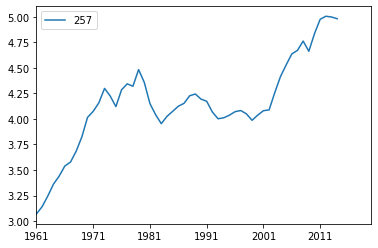

In [0]:
co2[co2["Country Name"] ==  "World"].T.iloc[5:].plot()

In [0]:
co2 = ...

In [0]:
co2.head()

,257
1961,3.07002
1962,3.14096
1963,3.24511
1964,3.36138
1965,3.44005


In [0]:
co2.index = pd.to_datetime(...
co2.rename...
co2.index..

In [0]:
#leave 
co2.head()

,co2
1961,3.07002
1962,3.14096
1963,3.24511
1964,3.36138
1965,3.44005


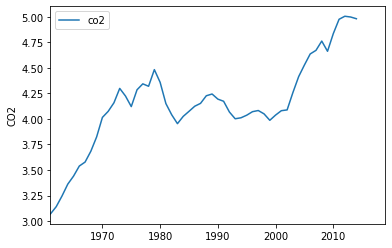

In [0]:
#leave 
co2.plot()
pl.ylabel("CO2"); 

caption...

 standardize the data by subtracting by the mean **over the time period 1960-2003** (which is the period that you will use) and dividing by the stdev over the same period

In [0]:
co2...

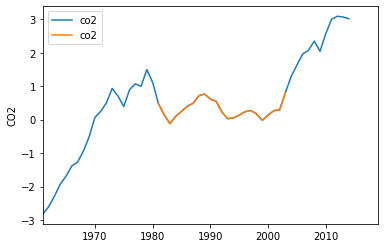

In [0]:
#leave
ax = co2.plot()
pl.ylabel("CO2"); 
co2.loc[
     (co2.index > 1980) & (co2.index <= 2003)].plot(ax=ax);

caption...

## Solar Irradiance

acquire the solar irradiance data from http://lasp.colorado.edu/data/sorce/tsi_data/TSI_TIM_Reconstruction.txt.  Explore the data as you did for the CO2 dataset. Modify the dataframe so that it has year as the index (pd.data_frame() type) and "[W/m^2]" is the only column, which you should rename "irradiance". Each year shoud have a single entry, the mean for that year, which you can obtain with the method DataFrame.groupby() and the .mean() method applied to the groupby object as 

```sIr.groupby("Year").mean()```

In [0]:
...
sIr.columns



Index([';', 'Year', 'Unnamed: 2', 'Unnamed: 3', 'TSI', '[W/m^2]'], dtype='object')

In [0]:
sIr.describe()

,;,Year,Unnamed: 2,Unnamed: 3,TSI,[W/m^2]
count,404.000000,0.0,0.0,0.0,0.0,404.000000
mean,1812.000000,NaN,NaN,NaN,NaN,1360.543793
std,116.769003,NaN,NaN,NaN,NaN,0.464534
min,1610.500000,NaN,NaN,NaN,NaN,1359.865500
25%,1711.250000,NaN,NaN,NaN,NaN,1360.191125
50%,1812.000000,NaN,NaN,NaN,NaN,1360.471800
75%,1912.750000,NaN,NaN,NaN,NaN,1360.821275
max,2013.500000,NaN,NaN,NaN,NaN,1362.142500


In [0]:
...
sIr = sIr.groupby...
sIr.rename...


Standardize the data by the value **strting in 1960**. (subtract by the mean and divide by the standard deviation)


In [0]:
sIr...

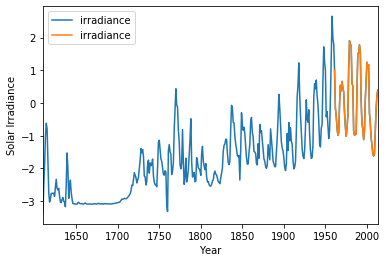

In [0]:
#leave
ax = sIr.plot()
ax = sIr[sIr.index>1960].plot(ax=ax);
pl.ylabel("Solar Irradiance");

caption...

# Global Temperature Anomaly

acquire the global anomaly (temperature difference) data which I save in the MLTSA_FBianco/HW4 repository as "GLB.Ts%2BdSST.csv"(never say that I am not nice!!)

This required some tricks to set the years as index due to missing values. the soution is in the repository README but I encourage you to figure out how to do it yourself (maybe in a single line of code!)


In [0]:
...
gt.head()

,Anomaly
Year,
1880,-0.187500
1881,-0.100833
1882,-0.110000
1883,-0.191667
1884,-0.294167


Standardize the anomaly data between 1960 and 2003

Text(0, 0.5, 'temperature anomaly')

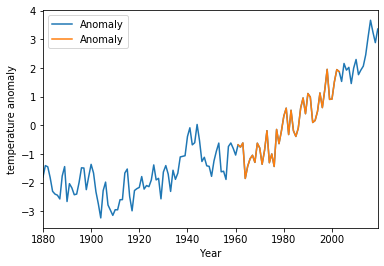

In [0]:
gt...
ax = gt.plot()
gt[(gt.index > 1960) & (gt.index <= 2003)].plot(ax=ax)
pl.ylabel("temperature anomaly")

caption...

Merge all dataframes using the index for all of them as merging column, You can do this in a single command concatenating merge() methods (like in the first homework).

In [0]:
climate = pd.merge...

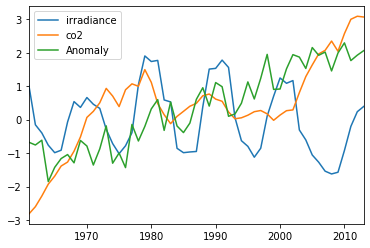

In [0]:
climate[["irradiance", "co2", "Anomaly"]].plot()

caption...

In [0]:
climate.describe()

,Anomaly,co2,irradiance
count,53.000000,53.000000,5.300000e+01
mean,0.360965,0.435486,-1.150432e-12
std,1.187409,1.313407,1.000000e+00
min,-1.850355,-2.817157,-1.622573e+00
25%,-0.637328,0.067079,-8.563154e-01
50%,0.405720,0.390812,-1.529831e-01
75%,1.456494,0.997972,6.613319e-01
max,2.294795,3.090899,1.904178e+00


# modeling
 import pydlm to create models of the global temperature anomaly.

 ## Model 1: 
 Create a model that has 
 - 1 a linera trend of degree 2 
 - a seasonality with 11 years period which correspond to the 11-years solar cycles https://en.wikipedia.org/wiki/Solar_cycle
 

 ## Model 2: 
 Create a model that has 
 - 1 a linera trend of degree 2 
 - a seasonality with 11 years period 
 - a regression on CO2, 
 
 
 ## Model 3
remove the regressor on the solar irradiance and see if the model is as good (i.e. does the 11 years cyle takes care of solar irradiance?) (e.g. you can check the MSE as ```model.getMSE()```


You can follow the examples here 
https://pydlm.github.io/example1.html#dynamic-linear-regression


In [0]:
# model 1
# A linear trend
linear_trend = trend(degree=2, discount=0.95, name='trend', w=4)
# A seasonality
seasonal11 = seasonality(period..., )
# Build a simple dlm
simple_dlm = dlm(climate.Anomaly) + linear_trend + seasonal11

In [0]:

regressor4 = dynamic(features=climate.iloc[:,1:2]...
regressed_dlm = ...

In [0]:
regressed_dlm_noir = ...

In [0]:
# Fit  model 1
simple_dlm.fit()
# Plot the fitted results
simple_dlm.turnOff('data points')

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


In [0]:
# Fit  model 2
regressed_dlm.fit()
# Plot the fitted results
regressed_dlm.turnOff('data points')

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


In [0]:
# Fit  model 3
regressed_dlm_noir.fit()
# Plot the fitted results
regressed_dlm_noir.turnOff('data points')

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


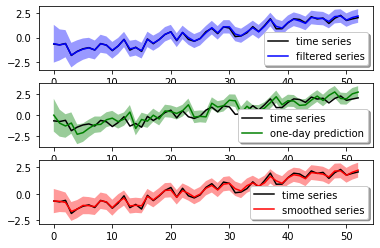

In [0]:
simple_dlm.plot()

caption...

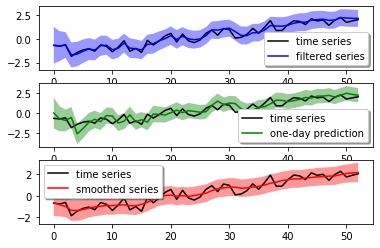

In [0]:
regressed_dlm.plot()

caption...

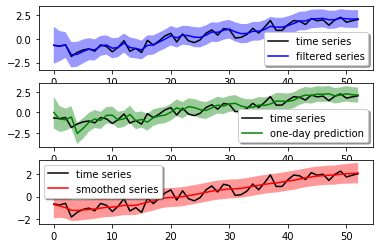

In [0]:
regressed_dlm_noir.plot()

caption...


NOTE: you can probably do a much better job than I did!

In [0]:
print(....)

MSE model fit: 
simple 0.43,
seasonality and CO2 + solar irradiance regression 0.35,
seasonality and CO2 regression 0.34


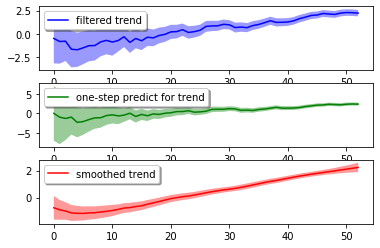

In [0]:
simple_dlm.plot('trend')

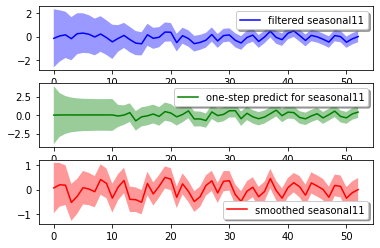

In [0]:
simple_dlm.plot('seasonal11')

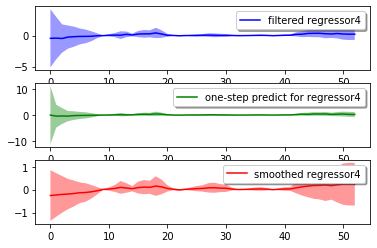

In [0]:
regressed_dlm.plot('regressor4')

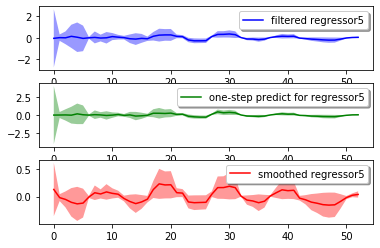

In [0]:
regressed_dlm.plot('regressor5')


for one or more of your models plot the residuals and discuss them following the examples here 
https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/SARIMAXDiagnostics_financialTS.ipynb

**I am leaving the code here, but do discuss the plots in captions!!!**


(array([3., 2., 2., 1., 2., 2., 6., 3., 0., 2.]),
 array([-1.44710912, -1.19037982, -0.93365053, -0.67692124, -0.42019194,
        -0.16346265,  0.09326665,  0.34999594,  0.60672523,  0.86345453,
         1.12018382]),
 <a list of 10 Patch objects>)

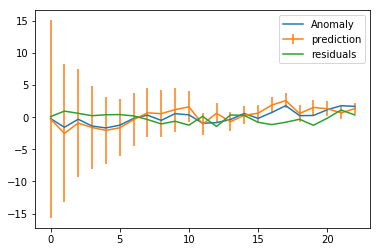

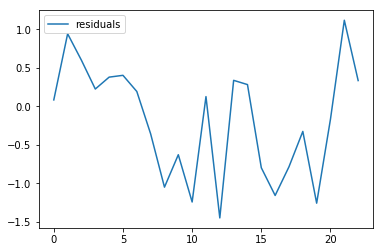

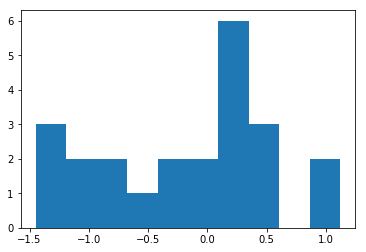

In [0]:
pred = [np.array(simple_dlm.predict(i))[0][0][0] for i in range(len(climate.Anomaly))]
err = [np.array(simple_dlm.predict(i))[1][0][0] for i in range(len(climate.Anomaly))]
pl.plot(range(len(climate.Anomaly)), climate.Anomaly, label="Anomaly")
pl.errorbar(range(len(climate.Anomaly)), pred, yerr=err, label="prediction")

resids = (climate.Anomaly.values - pred)
pl.errorbar(range(len(climate.Anomaly)), resids,  label="residuals")
pl.legend()

pl.figure()
pl.errorbar(range(len(climate.Anomaly)), resids,  label="residuals")
pl.legend()
pl.figure()
pl.hist(resids)



caption...

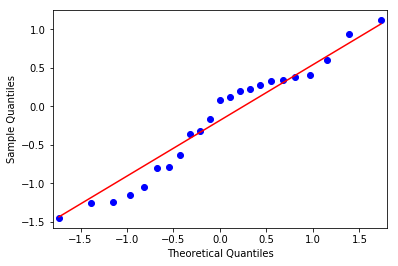

In [0]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(resids, line='s')
pyplot.show()

caption...

(array([6., 2., 3., 0., 2., 4., 1., 1., 1., 2.]),
 array([0.05008455, 0.2710353 , 0.49198605, 0.7129368 , 0.93388755,
        1.1548383 , 1.37578904, 1.59673979, 1.81769054, 2.03864129,
        2.25959204]),
 <a list of 10 Patch objects>)

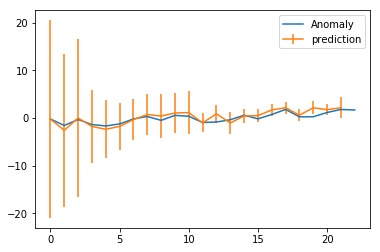

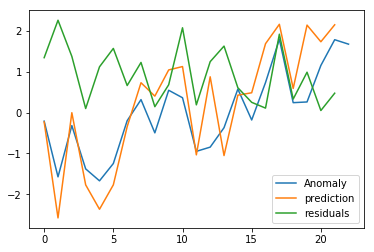

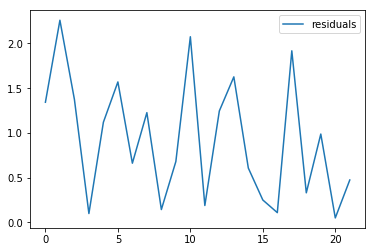

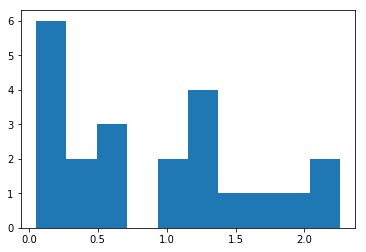

In [0]:
pred = [np.array(regressed_dlm.predict(i))[0][0][0] for i in range(len(climate.Anomaly)-1)]
err = [np.array(regressed_dlm.predict(i))[1][0][0] for i in range(len(climate.Anomaly)-1)]
pl.plot(range(len(climate.Anomaly)), climate.Anomaly, label="Anomaly")
pl.errorbar(range(len(climate.Anomaly)-1), pred, yerr=err, label="prediction")
pl.legend()

pl.figure()
pl.plot(range(len(climate.Anomaly)), climate.Anomaly, label="Anomaly")
pl.errorbar(range(len(climate.Anomaly)-1), pred, label="prediction")

resids = np.abs(climate.Anomaly.values[1:] - pred)
pl.errorbar(range(len(climate.Anomaly)-1), resids,  label="residuals")
pl.legend()

pl.figure()
pl.errorbar(range(len(climate.Anomaly)-1), resids,  label="residuals")
pl.legend()
pl.figure()
pl.hist(resids)


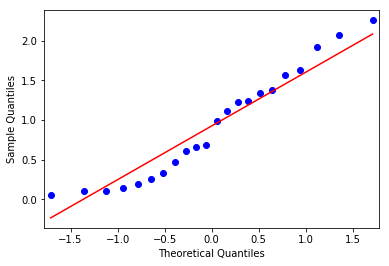

In [0]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(resids, line='s')
pyplot.show()

In [0]:
seed(1)
# generate univariate observations
# normality test
stat, p = shapiro(resids)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.929, p=0.118
Sample looks Gaussian (fail to reject H0)
